# Dataset exploratory analysis

"Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains." The project goal is to design and to compare ML algorithms (MLP, SVM, k-Nearest Neighbors and Decision Tree) that classify dry beans.

Repository link: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

In [17]:
# Installing dependencies and fetching dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
dry_bean_dataset = fetch_ucirepo(id=602)

In [4]:
# Information about the features
dry_bean_dataset.metadata['additional_info']['variable_info'].split('\r\n')

['1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.',
 '2.) Perimeter (P): Bean circumference is defined as the length of its border.',
 '3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.',
 '4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.',
 '5.) Aspect ratio (K): Defines the relationship between L and l.',
 '6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.',
 '7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.',
 '8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.',
 '9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.',
 '10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.',
 '11.)Roundn

In [17]:
# Checking the data types
dry_bean_dataset.data.original

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [18]:
# Investigating the amount of data in each class
dry_bean_dataset.data.original['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [19]:
# Controlling missing values
dry_bean_dataset.data.original.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

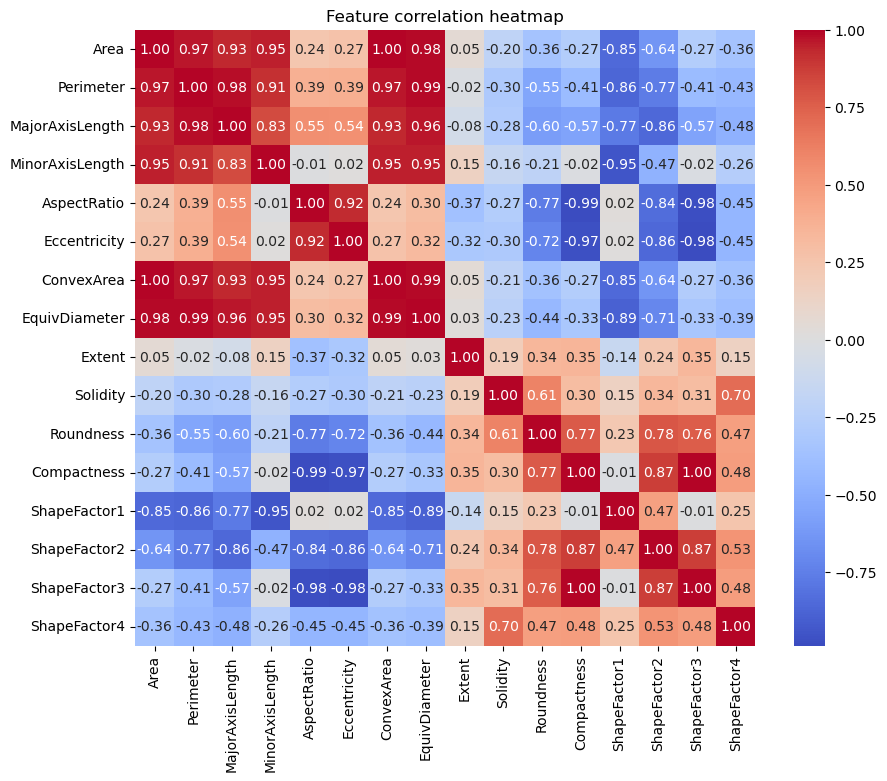

In [20]:
# Calculating feature correlation
correlation_matrix = dry_bean_dataset.data.features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature correlation heatmap')
plt.show()

In [5]:
# Eliminating duplicated data
print(dry_bean_dataset.data.original.shape)
dry_bean_dataset.data.original = dry_bean_dataset.data.original.drop_duplicates(ignore_index = True)
dry_bean_dataset.data.features = dry_bean_dataset.data.original.iloc[:,:-1]
dry_bean_dataset.data.targets = dry_bean_dataset.data.original['Class'].to_frame(name = 'Class')
print(dry_bean_dataset.data.original.shape)

(13611, 17)
(13543, 17)


In [6]:
# Splitting dataset in training (70%) and test (30%) subsets
X_train, X_test, y_train, y_test = train_test_split(dry_bean_dataset.data.features, dry_bean_dataset.data.targets, test_size=0.3, random_state=42)

In [7]:
# Saving processed datasets
with open('X_train', 'wb') as file: pickle.dump(X_train, file)
with open('y_train', 'wb') as file: pickle.dump(y_train, file)
with open('X_test' , 'wb') as file: pickle.dump(X_test,  file)
with open('y_test' , 'wb') as file: pickle.dump(y_test,  file)

Most of the features are float, two features are integer, and one label is object. Moreover, there are no missing values. On the other hand, the dataset has imbalanced data for each class; F1 score will be used as harmonic mean for hyperparameter tuning due to the skewed dataset, although oversampling technique will be used as well. Aditionally, the feature correlation shows six features (area, perimeter, majorAxisLength, minorAxisLength, convexArea, and equivDiameter) with high correlation values between 0.83 and 1.00; for further steps it will be considered that they may carry redundant information leading to overfitting. Meanwhile, there were 68 identical entries that were removed.